<a href="https://colab.research.google.com/github/sarfara253/Customer_Segmentation_K-mean_clustering/blob/main/Customer_Segmentation_K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('/content/sample_data/Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
data.shape

(200, 5)

In [7]:
print("Number of Rows", data.shape[0])
print("Number of Columns", data.shape[1])

Number of Rows 200
Number of Columns 5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
#K-Means Clustering

In [12]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
X=data[['Annual Income (k$)','Spending Score (1-100)']]

In [15]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=5, random_state=42)
y_means = k_means.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

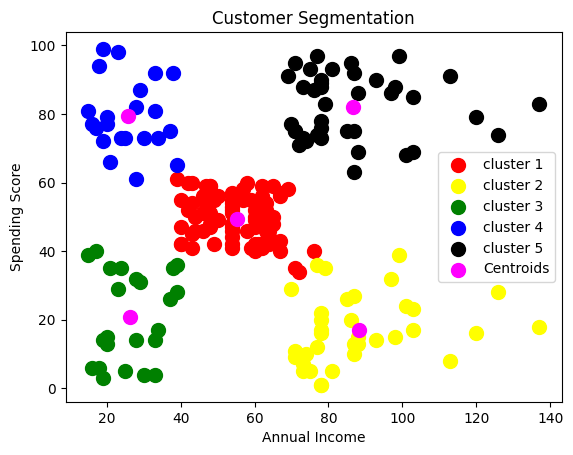

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have already performed KMeans and obtained y_means

# Scatter plot for each cluster
plt.scatter(X.iloc[y_means==0, 0], X.iloc[y_means==0, 1], s=100, c='red', label="cluster 1")
plt.scatter(X.iloc[y_means==1, 0], X.iloc[y_means==1, 1], s=100, c='yellow', label="cluster 2")
plt.scatter(X.iloc[y_means==2, 0], X.iloc[y_means==2, 1], s=100, c='green', label="cluster 3")
plt.scatter(X.iloc[y_means==3, 0], X.iloc[y_means==3, 1], s=100, c='blue', label="cluster 4")
plt.scatter(X.iloc[y_means==4, 0], X.iloc[y_means==4, 1], s=100, c='black', label="cluster 5")

# Scatter plot for cluster centers
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=100, c="magenta", label="Centroids")

# Plot labels and legend
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()

# Show the plot
plt.show()



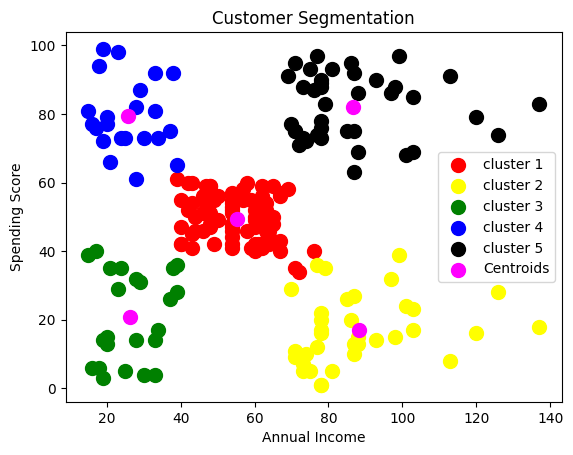

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X.iloc[y_means==0, 0], X.iloc[y_means==0, 1], s=100, c='red', label="cluster 1")
plt.scatter(X.iloc[y_means==1, 0], X.iloc[y_means==1, 1], s=100, c='yellow', label="cluster 2")
plt.scatter(X.iloc[y_means==2, 0], X.iloc[y_means==2, 1], s=100, c='green', label="cluster 3")
plt.scatter(X.iloc[y_means==3, 0], X.iloc[y_means==3, 1], s=100, c='blue', label="cluster 4")
plt.scatter(X.iloc[y_means==4, 0], X.iloc[y_means==4, 1], s=100, c='black', label="cluster 5")
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=100, c="magenta", label="Centroids")
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()  # Corrected from plt.lagend to plt.legend()
plt.show()


In [21]:
k_means.predict([[15,39]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

In [22]:
from sklearn.cluster import KMeans

In [23]:
k_means=KMeans()
k_means.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [24]:
k_means= KMeans()
k_means.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2,
       7, 2, 7, 2, 7, 4, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 4, 2, 4, 4,
       7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6], dtype=int32)

In [25]:
#Elbow mwthod

In [26]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i)  # Change n_cluster to n_clusters
    k_means.fit(X)
    wcss.append(k_means.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [27]:
wcss

[269981.28,
 183069.17582751298,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37239.835542456036,
 30259.65720728547,
 25028.020475269415,
 21794.8856090982,
 19704.12354314778]

In [28]:
import matplotlib.pyplot as plt

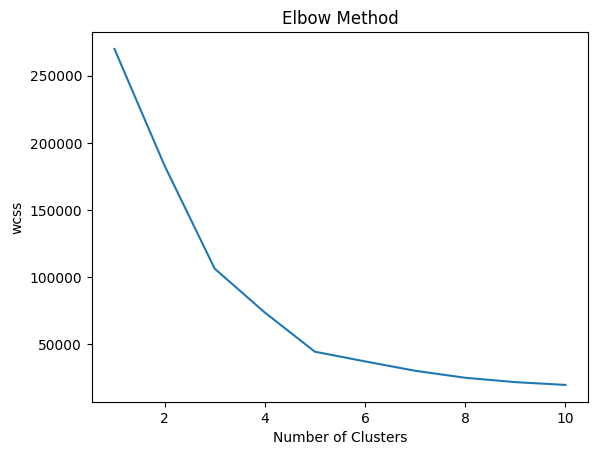

In [29]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [30]:
#Save the model

In [31]:
import joblib

In [32]:
joblib.dump(k_means,"Customer_Segmentation")

['Customer_Segmentation']

In [33]:
model=joblib.load("Customer_Segmentation")

In [34]:
model.predict([[15,39]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([5], dtype=int32)